Web Traffic Analysis
        Here we measuring and understanding the behavior of visitors to a website or app, It can help website owners and managers to optimize their content, design, marketing, and performance.
        Web traffic analysis can provide insights into metrics such as page views, bounce rate, conversion rate, user demographics, user behavior, and user feedback. 
        In this notebook we are going to do data preprocessiong.




importing required libraries.

In [24]:
import opendatasets as od 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from sklearn.preprocessing import LabelEncoder
from dateutil.parser import parse
from sklearn.linear_model import LinearRegression 
import warnings
warnings.filterwarnings('ignore')

Importing and reading the Dataset given for analysis. 

In [25]:
data=pd.read_csv(r'D:\naan mudhalvan\daily-website-visitors\daily-website-visitors.csv')
label=LabelEncoder()
data['Day']=label.fit_transform(data['Day'])
data.tail()


,Row,Day,DayOfWeek,Date,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits
2162,2163,2,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,3,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,1,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,5,3,8/18/2020,"3,581","2,683","2,184",499
2166,2167,6,4,8/19/2020,"2,064","1,564","1,297",267


In [26]:
data.isna().count()

Row                2167
Day                2167
DayOfWeek          2167
Date               2167
PageLoads          2167
UniqueVisits       2167
FirstTimeVisits    2167
ReturningVisits    2167
dtype: int64

In [27]:
data.dtypes

Row                 int64
Day                 int32
DayOfWeek           int64
Date               object
PageLoads          object
UniqueVisits       object
FirstTimeVisits    object
ReturningVisits    object
dtype: object

getting detialed statistical description about the data.

In [6]:
data.describe()

,Row,Day,DayOfWeek
count,2167.000000,2167.000000,2167.000000
mean,1084.000000,3.001384,3.997231
std,625.703338,2.000577,2.000229
min,1.000000,0.000000,1.000000
25%,542.500000,1.000000,2.000000
50%,1084.000000,3.000000,4.000000
75%,1625.500000,5.000000,6.000000
max,2167.000000,6.000000,7.000000


Extracting month from date and year using pandas for futher analysis... 

In [8]:
#finding the months
datas=data.copy(deep=True)
datass=data.copy(deep=True)
months=datas['Date']
year=datas['Date']
for i in range(len(months)):
    if '-' in months[i]:
        value=months[i].split('-')
    if '/' in months[i]:
        value=months[i].split('/')
    
   
    months[i]=int(value[0])
        
print(months)



0       9
1       9
2       9
3       9
4       9
       ..
2162    8
2163    8
2164    8
2165    8
2166    8
Name: Date, Length: 2167, dtype: object


In [9]:
year=datass['Date']
for i in range(len(year)):
    if '-' in year[i]:
        s=year[i].split('-')
    if '/' in year[i]:
        s=year[i].split('/')

    year[i]=int(s[2])

This is the final dataset for the analysis

In [10]:
months=months.astype(int)
year=year.astype(int)
data[['PageLoads','UniqueVisits','FirstTimeVisits']]=x=data[['PageLoads','UniqueVisits','FirstTimeVisits']].replace(',', '', regex=True).astype(int)

data['month']=months
data['year']=year
data.head()

,Row,Day,DayOfWeek,Date,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits,month,year
0,1,3,1,9/14/2014,2146,1582,1430,152,9,2014
1,2,1,2,9/15/2014,3621,2528,2297,231,9,2014
2,3,5,3,9/16/2014,3698,2630,2352,278,9,2014
3,4,6,4,9/17/2014,3667,2614,2327,287,9,2014
4,5,4,5,9/18/2014,3316,2366,2130,236,9,2014


In [11]:
data=data.sort_values(by=['year','month'],ascending=True)
data.tail()

,Row,Day,DayOfWeek,Date,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits,month,year
2162,2163,2,7,8/15/2020,2221,1696,1373,323,8,2020
2163,2164,3,1,8/16/2020,2724,2037,1686,351,8,2020
2164,2165,1,2,8/17/2020,3456,2638,2181,457,8,2020
2165,2166,5,3,8/18/2020,3581,2683,2184,499,8,2020
2166,2167,6,4,8/19/2020,2064,1564,1297,267,8,2020


checking whether it has null values or not using missing no 

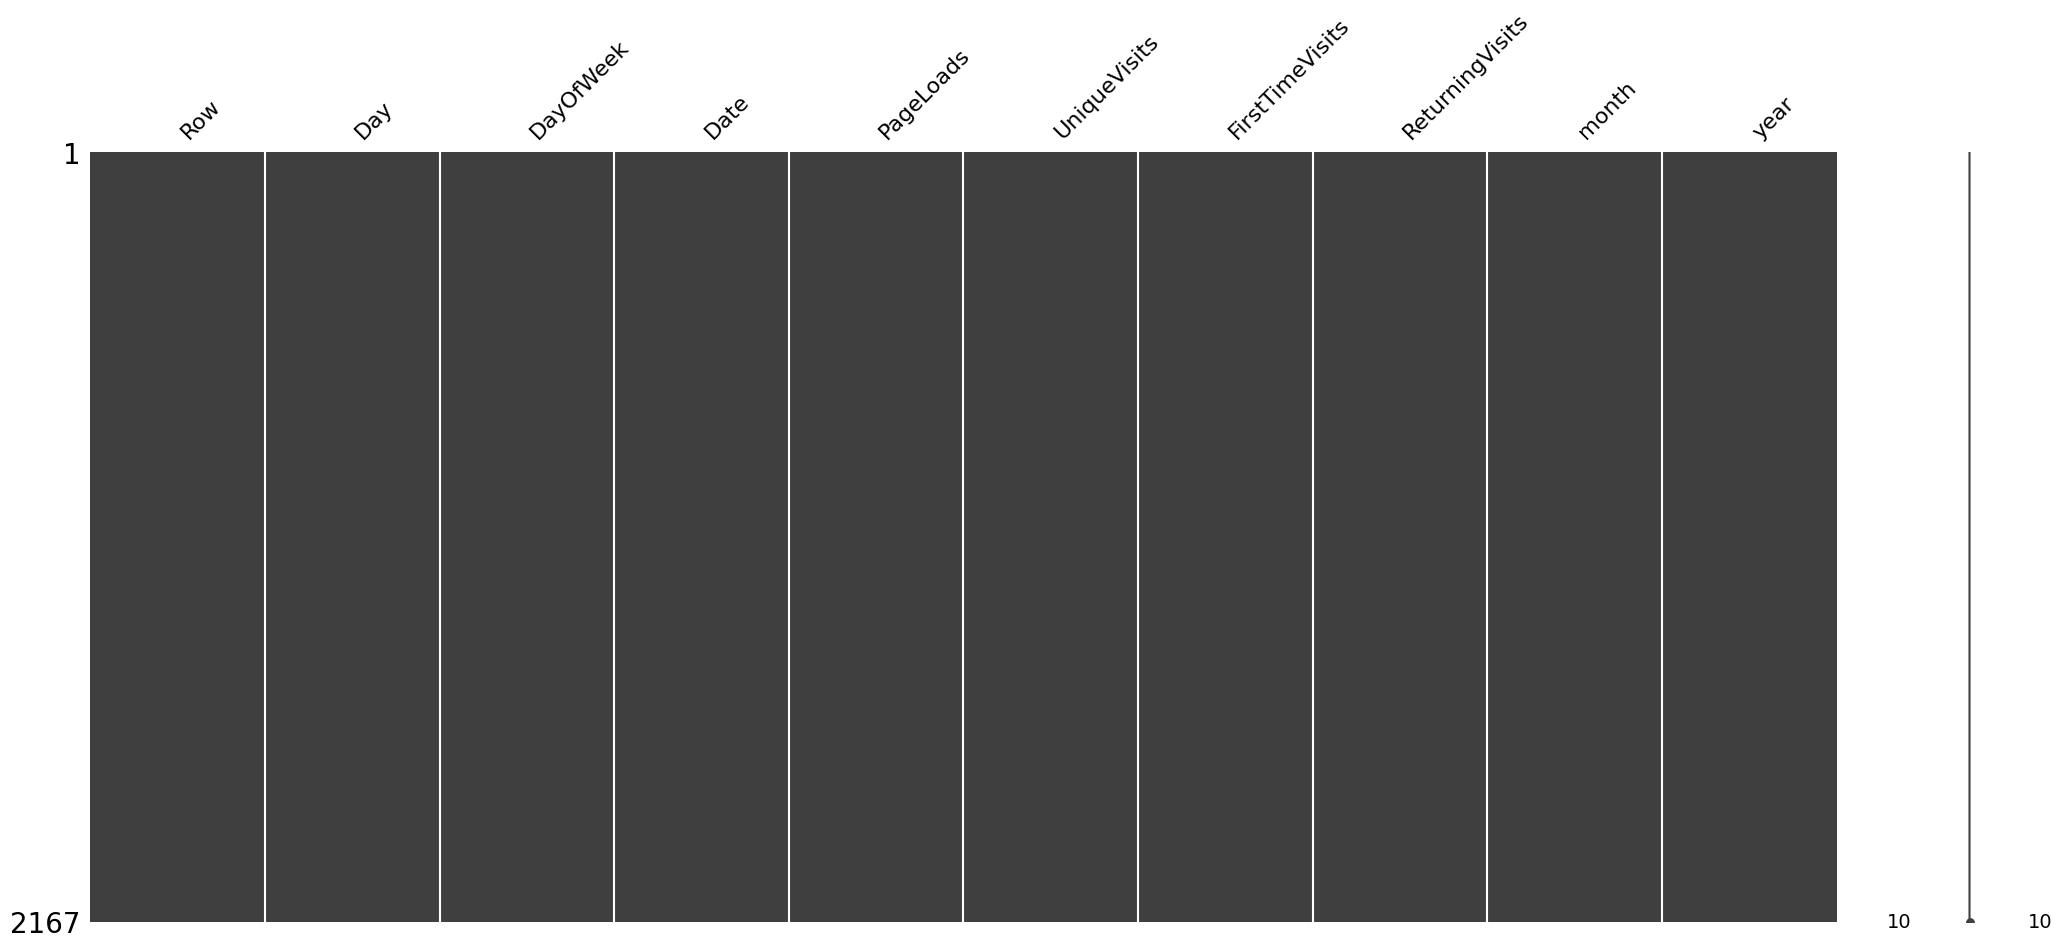

In [12]:
missingno.matrix(data)
plt.show()

fetching the yearwise trends...

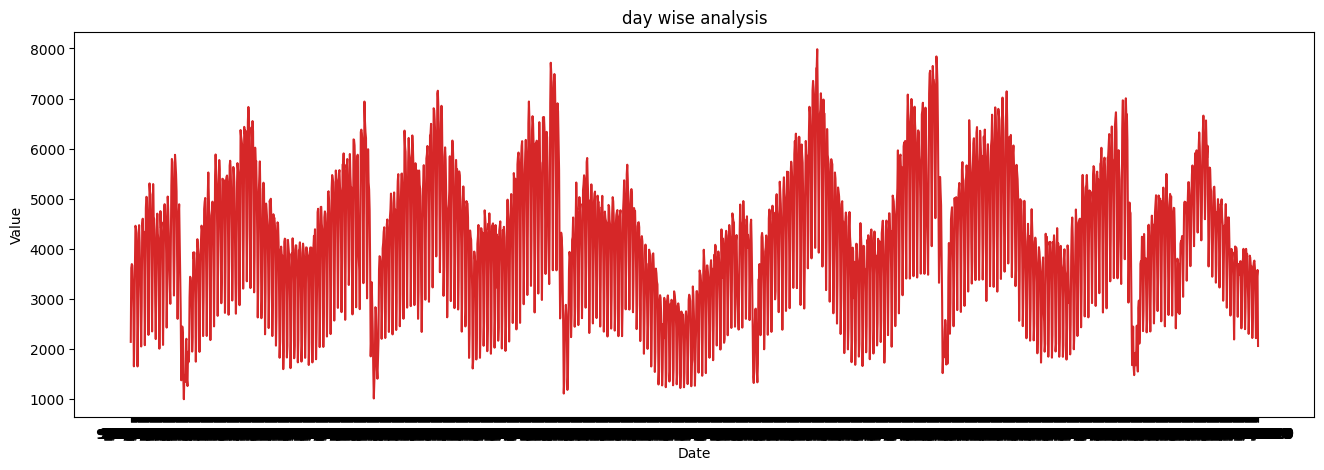

In [15]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(data,x=data.Date,y=data.PageLoads,title='day wise analysis')


visualizing the growth of datas

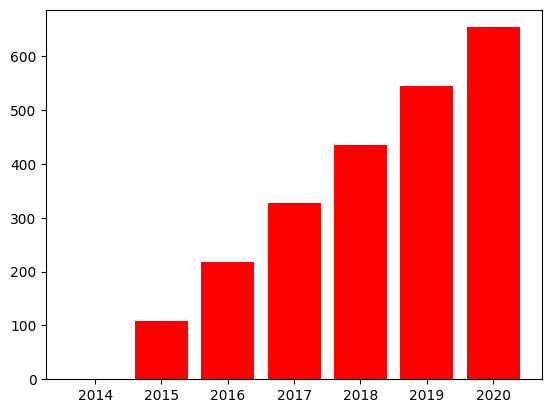

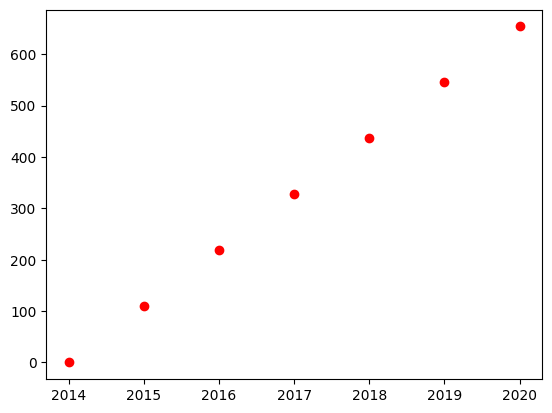

In [18]:

q=data.groupby(by=['year'])["ReturningVisits"]
year_wise=pd.DataFrame(q)
g=[]
for i in range(len(data.year.unique())):
    v=0
    for j in year_wise[1][0]:
        v+=i
    g.append(v)
plt.bar(data.year.unique(),g,color="red")
plt.show()
plt.scatter(data.year.unique(),g,color="red")
plt.show()

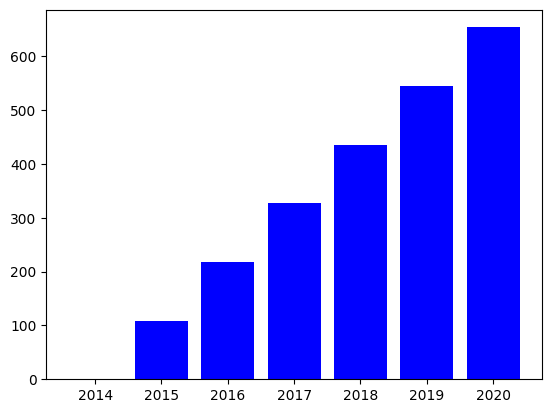

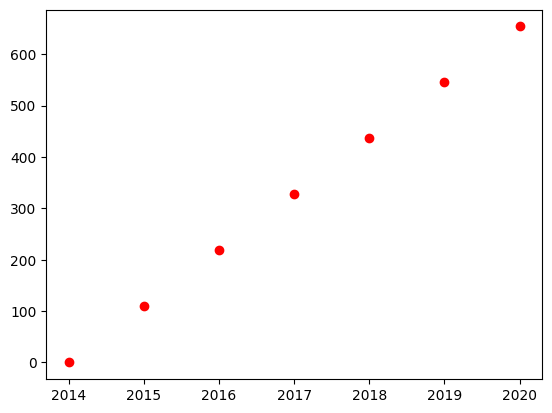

In [19]:

q=data.groupby(by=['year'])["UniqueVisits"]
year_wise=pd.DataFrame(q)
g=[]
for i in range(len(data.year.unique())):
    v=0
    for j in year_wise[1][0]:
        v+=i
    g.append(v)
plt.bar(data.year.unique(),g,color="blue")
plt.show()
plt.scatter(data.year.unique(),g,color="red")
plt.show()

In [20]:
data1=data.copy(deep=True)


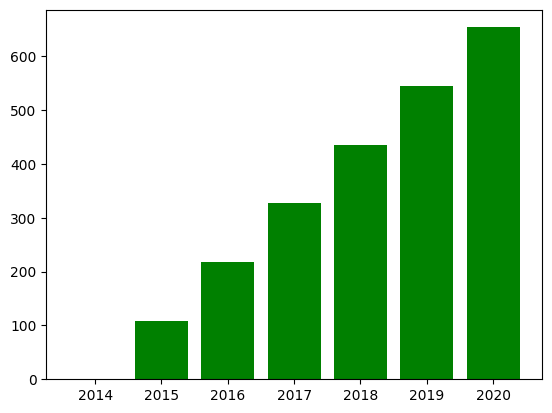

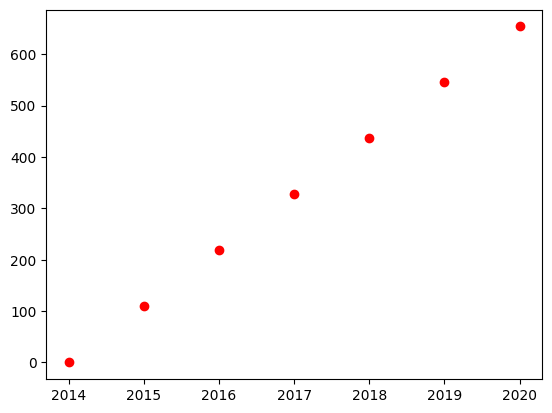

In [21]:
q=data.groupby(by=['year'])["FirstTimeVisits"]
year_wise=pd.DataFrame(q)
g=[]
for i in range(len(data.year.unique())):
    v=0
    for j in year_wise[1][0]:
        v+=i
    g.append(v)
plt.bar(data.year.unique(),g,color="green")
plt.show()
plt.scatter(data.year.unique(),g,color="red")
plt.show()

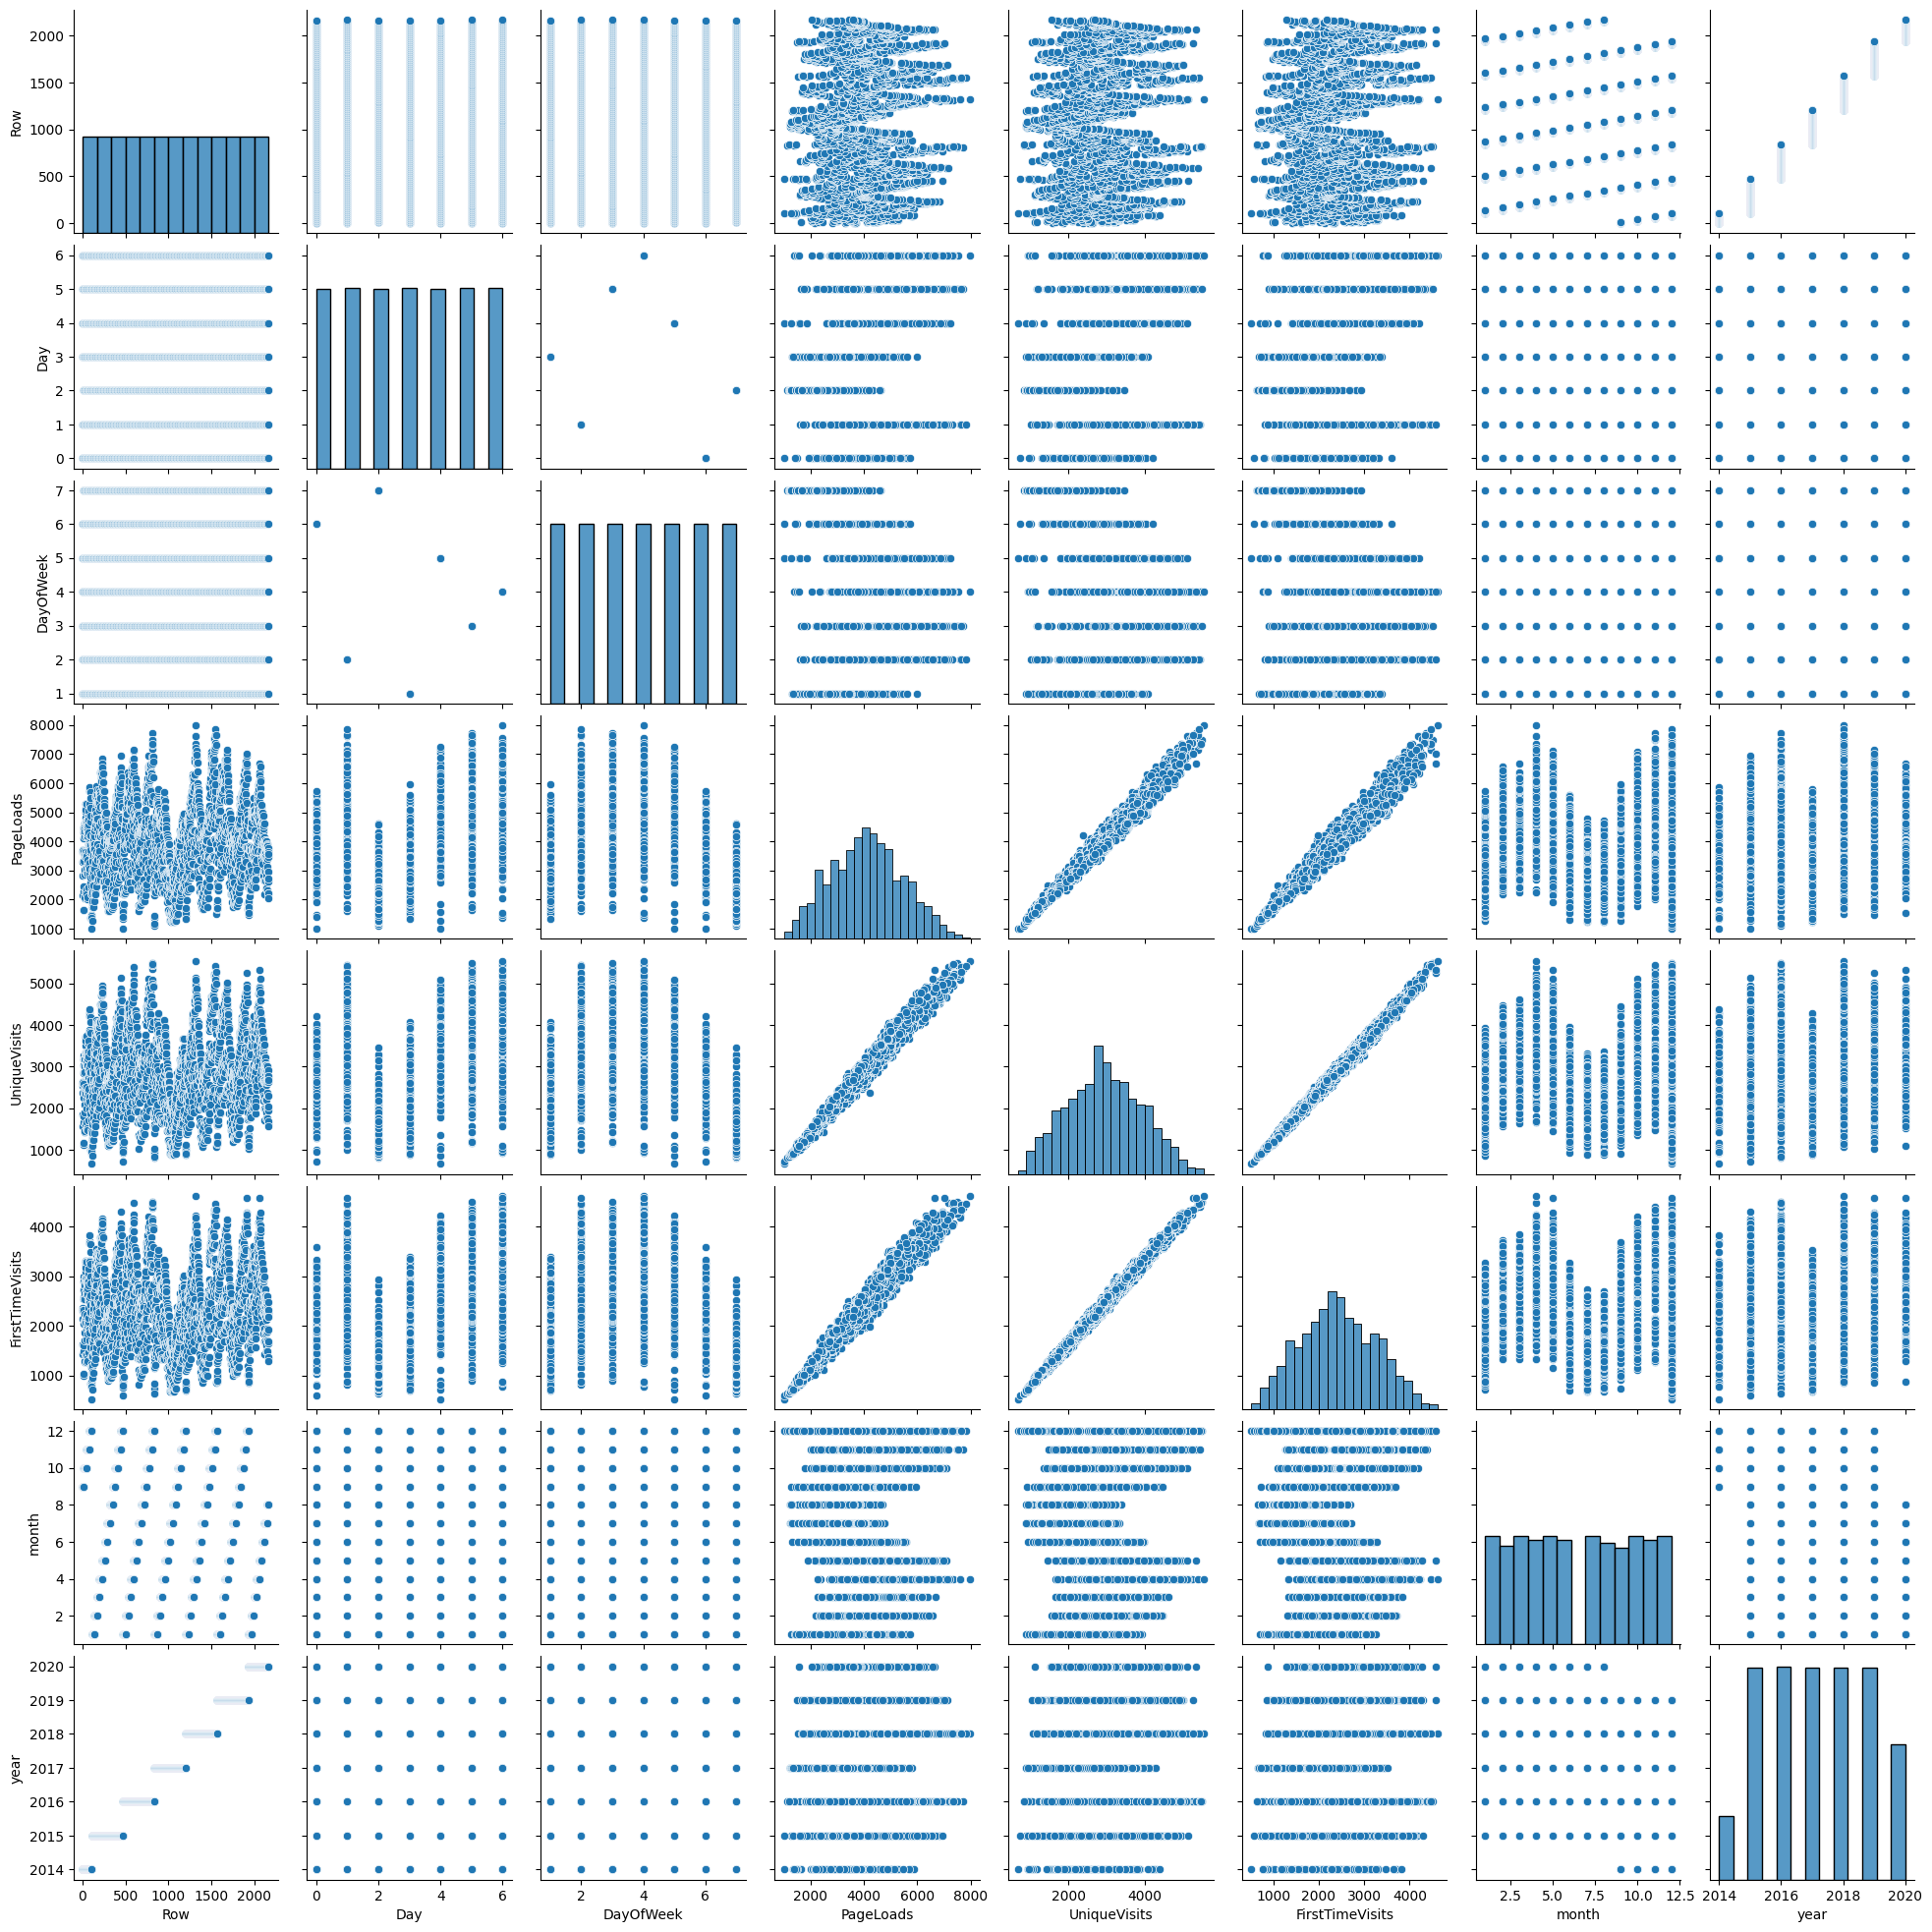

In [22]:
sns.pairplot(data)

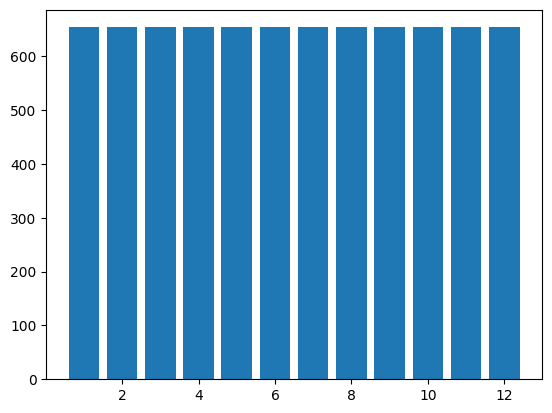

In [23]:
d=data.groupby(by=['month'])['ReturningVisits']
month_wise=pd.DataFrame(q)
e=[]
for i in range(len(data.month.unique())):
    u=0
    for j in month_wise[1][0]:
        u+=i
    e.append(v)
plt.bar(data.month.unique(),e)
plt.show()